In [560]:
from PIL import Image
import numpy as np
import os
import math
import cv2
from sklearn.linear_model import LinearRegression

In [561]:
X = []
Y = []

In [562]:
folder_path = "datasets/eggs"
for filename in os.listdir(folder_path):
    if filename.endswith(".png") and filename.startswith("1"):
        # Extract grams from the image name donot include the .png
        grams = float(filename.split("-")[1].split(".png")[0])
        
        # Load grayscale image
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Calculate the number of white pixels
        threshold = np.mean(image)
        above_threshold = image > threshold
        white_pixels = np.sum(above_threshold)
    
        # Append to X and Y lists
        X.append(white_pixels)
        Y.append(grams)
    
# save the X and Y to one csv file
# unsorted = np.column_stack((X, Y))
# sorted = unsorted[unsorted[:,0].argsort()]
# np.savetxt("datasets/eggs.csv", sorted, delimiter=",", fmt='%s')

In [563]:
print(X)
print(Y)

[54031, 64354, 53438, 55910, 53439, 55849, 62168, 57768, 56334, 53454, 58372, 55914, 58999, 53964, 52340, 61399, 61761, 56466, 60922, 55339, 55529, 52071, 56456, 56693, 51847, 47860, 49494, 56230, 62931, 55274, 48425, 60764, 52635, 52285, 59893, 57507, 53593, 56262, 56680, 56301, 50762, 51055, 58805, 49818, 50954, 60957, 55649, 58865, 56227, 51251, 55065, 61461, 47411, 58870, 50683, 54141, 53667, 48783, 52799, 59487, 54116, 55201, 56398, 52716, 60626, 54303, 56988, 49500, 56497, 52236, 51326, 51085, 58424, 48066, 60210, 50272, 49922, 58327, 59833, 54564, 49729, 55220, 63358, 57435, 58832, 52091, 54978, 48232, 56883, 58439, 52376, 59850, 53585, 55453, 59376, 52769, 49413, 52750, 56268, 55292, 49722, 49047, 58276, 52832, 64172, 58149, 54994, 55696, 56097, 65183, 62451, 58694, 56443, 57041, 48908, 51495, 48697, 53153, 64910, 53369, 60437, 57123, 53577, 52820, 52748, 60184, 51431, 48765, 52707, 50655, 59018, 59923, 54071, 53709, 62905, 47646, 49713, 49737, 52733, 49589, 59674, 57436, 67460

In [564]:
# load datasets/eggs/eggs.csv
for line in open("datasets/eggs.csv"):
    # Split line on comma
    data = line.split(",")
    
    # Extract grams and yolks
    grams = float(data[1])
    pixels = float(data[0])
    
    # Append to X and Y lists
    X.append(pixels)
    Y.append(grams)

X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

print (X)
print (Y)

[[54031.]
 [64354.]
 [53438.]
 ...
 [69544.]
 [69345.]
 [69343.]]
[57.8 70.6 58.7 ... 75.6 75.4 75.7]


In [565]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [566]:
new_white_pixels = 43953  # Example value
predicted_grams = model.predict([[new_white_pixels]])
print("Predicted grams:", predicted_grams)

Predicted grams: [46.08292981]


In [567]:
# save the model
import pickle
filename = 'model/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [568]:
# load the model from disk
model = pickle.load(open(filename, 'rb+'))

pewee_count = 0
small_count = 0
medium_count = 0
large_count = 0
xl_count = 0
jumbo_count = 0

# for filename in os.listdir(test_path):
#     if filename.endswith(".png") and filename.startswith("1"):
#         # Extract grams from the image name donot include the .png
#         wpixels = int(filename.split("-")[2].split(".png")[0])
for line in open("datasets/tests.csv"):
    xtest = float(line)
    result = model.predict([[xtest]])
    result = math.floor(result[0])
    if result >= 40 and result <= 49:
        pewee_count = pewee_count + 1
    elif result >= 50 and result <= 54:
        small_count = small_count + 1
    elif result >= 55 and result <= 59:
        medium_count = medium_count + 1
    elif result >= 60 and result <= 64:
        large_count = large_count + 1
    elif result >= 65 and result <= 69:
        xl_count = xl_count + 1
    elif result >= 70:
        jumbo_count = jumbo_count + 1

print(pewee_count)
print(small_count)
print(medium_count)
print(large_count)
print(xl_count)
print(jumbo_count)

18
25
18
21
18
20


In [569]:
# calculate the accuracy with the test data count using cross entropy
pewee_accuracy = pewee_count / 20
small_accuracy = small_count / 20
medium_accuracy = medium_count / 20
large_accuracy = large_count / 20
xl_accuracy = xl_count / 20
jumbo_accuracy = jumbo_count / 20

pewee_accuracy = pewee_accuracy * 100
small_accuracy = small_accuracy * 100
medium_accuracy = medium_accuracy * 100
large_accuracy = large_accuracy * 100
xl_accuracy = xl_accuracy * 100
jumbo_accuracy = jumbo_accuracy * 100

pa = pewee_accuracy if pewee_accuracy < 100 else 100
sa = small_accuracy if small_accuracy < 100 else 100
ma = medium_accuracy if medium_accuracy < 100 else 100
la = large_accuracy if large_accuracy < 100 else 100
xa = xl_accuracy if xl_accuracy < 100 else 100
ja = jumbo_accuracy if jumbo_accuracy < 100 else 100

overall_accuracy = (pa + sa + ma + la + xa + ja) / 6

print(f"Pewee prediction accuracy: {pa}%")
print(f"Small prediction accuracy: {sa}%")
print(f"Medium prediction accuracy: {ma}%")
print(f"Large prediction accuracy: {la}%")
print(f"XL prediction accuracy: {xa}%")
print(f"Jumbo prediction accuracy: {ja}%")
print("--------------------------------------")
print(f"Overall prediction accuracy: {overall_accuracy}%")


Pewee prediction accuracy: 90.0%
Small prediction accuracy: 100%
Medium prediction accuracy: 90.0%
Large prediction accuracy: 100%
XL prediction accuracy: 90.0%
Jumbo prediction accuracy: 100%
--------------------------------------
Overall prediction accuracy: 95.0%


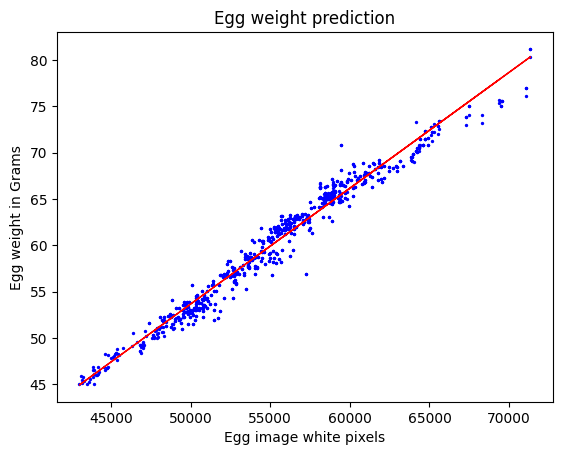

In [570]:
import matplotlib.pyplot as plt

# Data to plot is X and Y using scatter plot # with the fit line
plt.scatter(X, Y, color='blue', s=2)
plt.plot(X, model.predict(X), color='red', linewidth=1)
# put the Y-axis label
plt.ylabel('Egg weight in Grams')
# put the X-axis label
plt.xlabel('Egg image white pixels')
# put the title
plt.title('Egg weight prediction')
# show the plot
plt.show()

In [571]:
# print the table summary
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.192e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:14:18   Log-Likelihood:                -1640.2
No. Observations:                1027   AIC:                             3284.
Df Residuals:                    1025   BIC:                             3294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9044      0.389    -22.870      0.0